In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df=pd.read_csv(r"C:\Users\pushk\OneDrive\Desktop\Maternal Health Risk Data Set.csv")

In [6]:
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [16]:
df = df.drop_duplicates().reset_index(drop=True)

In [18]:
df.loc[df.HeartRate == 7, "HeartRate"] = 70

In [19]:
df.describe()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000
mean,29.194690,110.553097,75.418142,8.346173,98.692478,74.088496
std,13.767379,17.872282,13.754578,2.829209,1.410897,7.524161
min,10.000000,70.000000,49.000000,6.000000,98.000000,60.000000
25%,19.000000,90.000000,65.000000,6.900000,98.000000,70.000000
50%,25.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,35.000000,120.000000,86.000000,7.900000,98.000000,80.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000


Text(0.5, 1.0, 'Heart Rate by Risk Level')

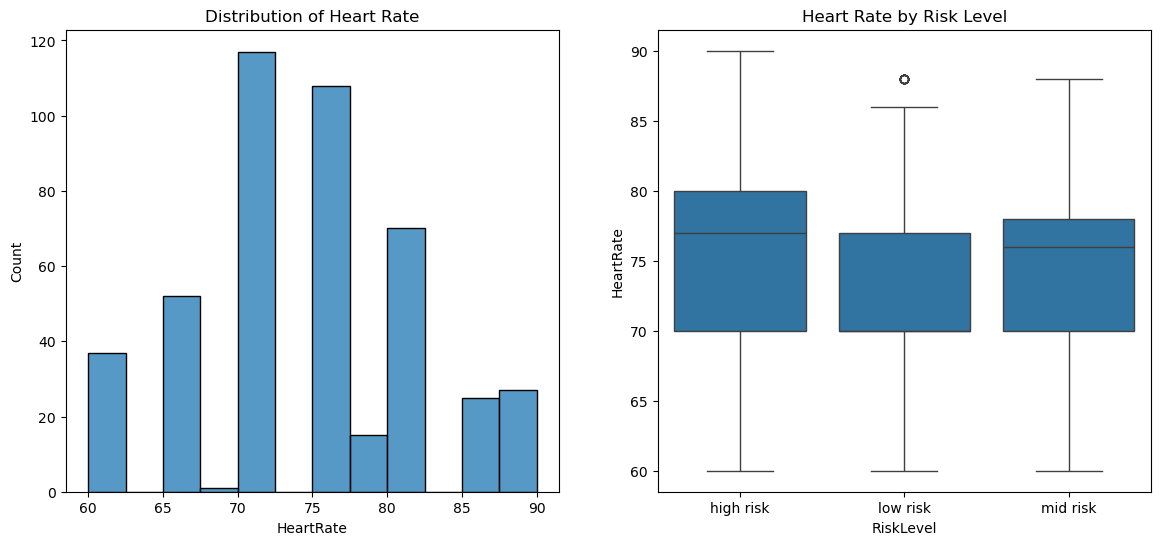

In [20]:
fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(14,6))

sns.histplot(ax=axes[0], x=df.HeartRate)
axes[0].set_title("Distribution of Heart Rate")

sns.boxplot(ax=axes[1], x=df.RiskLevel, y=df.HeartRate)
axes[1].set_title("Heart Rate by Risk Level")

Text(0.5, 1.0, 'BodyTemp by Risk Level')

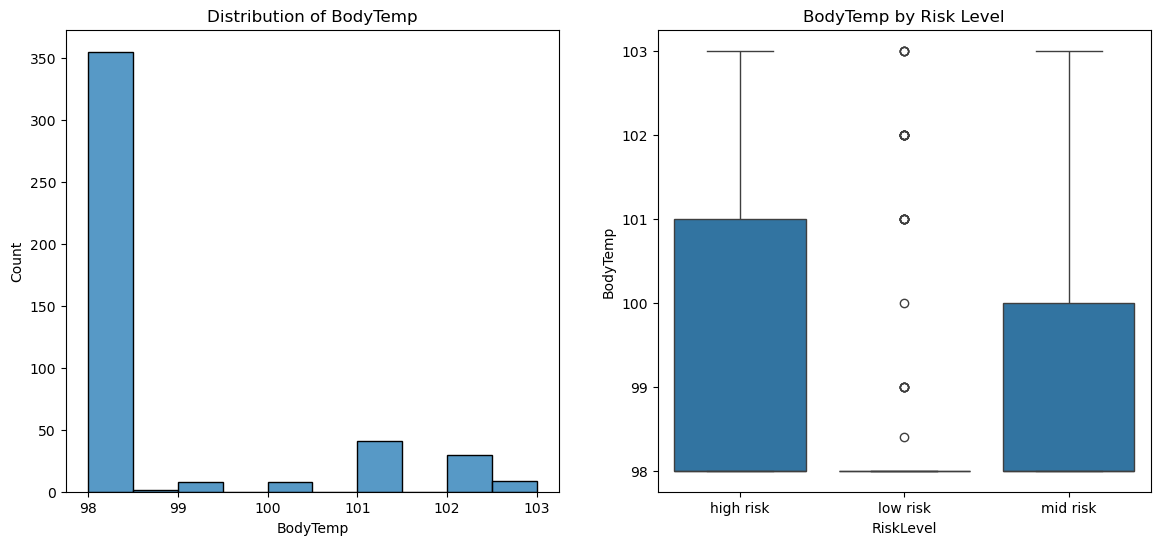

In [21]:
fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(14,6))

sns.histplot(ax=axes[0], x=df.BodyTemp)
axes[0].set_title("Distribution of BodyTemp")

sns.boxplot(ax=axes[1], x=df.RiskLevel, y=df.BodyTemp)
axes[1].set_title("BodyTemp by Risk Level")

Text(0.5, 1.0, 'Blood glucose by Risk Level')

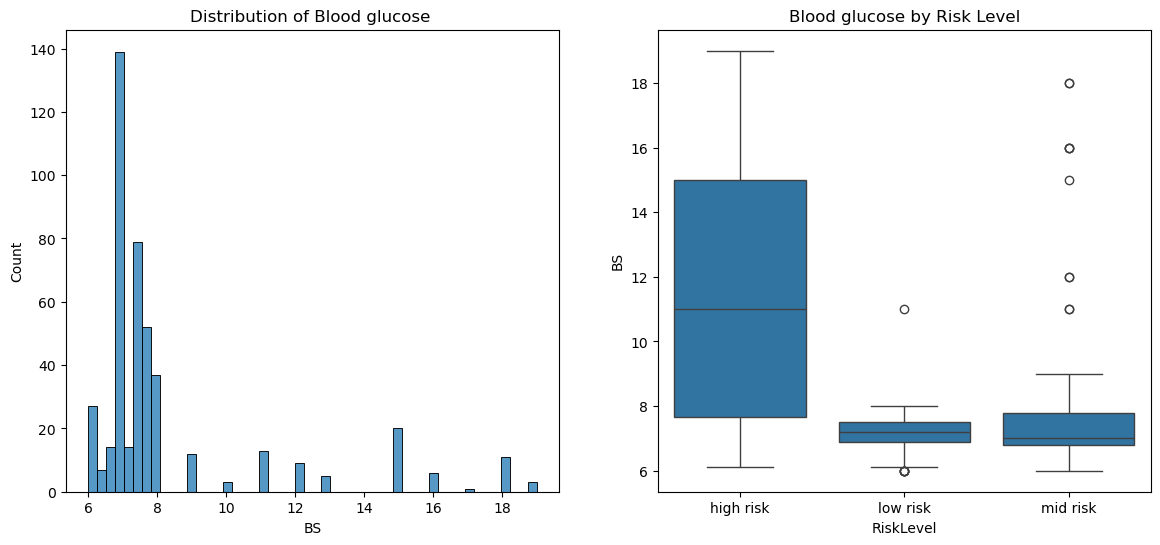

In [22]:
fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(14,6))

sns.histplot(ax=axes[0], x=df.BS)
axes[0].set_title("Distribution of Blood glucose ")

sns.boxplot(ax=axes[1], x=df.RiskLevel, y=df.BS)
axes[1].set_title("Blood glucose by Risk Level")